In [1]:
# Playing about with the RHESSI flare list
# The full list is here:
# https://hesperia.gsfc.nasa.gov/hessidata/dbase/hessi_flare_list.txt
# Containing 121,180 events
# 
# Have filtered this down to the "good" events using the approach detailed in
# Loumou, Hannah & Hudson (2018) https://doi.org/10.1051/0004-6361/201731050
# i.e. solar position, good RAS and 
# gives pre-flare background subtracted GOES 1-8 >=1e-8, giving 75,307 events. 
# This was all done in SWW/IDL and saved out to be loaded in here
# 
# IGH 08-July-2020

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.io as io

import warnings
warnings.simplefilter('ignore')

In [3]:
fl=io.readsav('full_fl.dat')

In [4]:
print(fl.keys())

dict_keys(['id_num', 'x', 'y', 'yr', 'lat', 'lng', 'ptim', 'stim', 'etim', 'enghi', 'a0only', 'bsgclass', 'bsges', 'gclass', 'ges'])


In [5]:
# How many flares in total?
print('Num events: ',len(fl['id_num']))

Num events:  75307


In [6]:
#  So how many of these flares were during the shutter out times?
#  Should be mostly microflares
a0id=np.where(fl['a0only'] == 1)
# print(a0id[0].shape)
print('A0 events: ',len(a0id[0]))

# How many A0 only and detectable in 12-25 keV or higher?\
a0id12=np.where((fl['a0only'] == 1) & (fl['enghi'] >= 12))
# print(a0id12[0].shape)
print('A0 events & >12 keV: ',len(a0id12[0]))

A0 events:  68839
A0 events & >12 keV:  14395


In [7]:
# What about just number of A, B, C, M, X flares?
# Using the pre-flare background subtracted GOES 1-8 fluxes
acls=np.where((fl['bsges'] >= 1e-8) & (fl['bsges'] < 1e-7))
bcls=np.where((fl['bsges'] >= 1e-7) & (fl['bsges'] < 1e-6))
ccls=np.where((fl['bsges'] >= 1e-6) & (fl['bsges'] < 1e-5))
mcls=np.where((fl['bsges'] >= 1e-5) & (fl['bsges'] < 1e-4))
xcls=np.where((fl['bsges'] >= 1e-4) )
print('A Flares: ',len(acls[0]))
print('B Flares: ',len(bcls[0]))
print('C Flares: ',len(ccls[0]))
print('M Flares: ',len(mcls[0]))
print('X Flares: ',len(xcls[0]))

A Flares:  47433
B Flares:  22694
C Flares:  4599
M Flares:  528
X Flares:  53


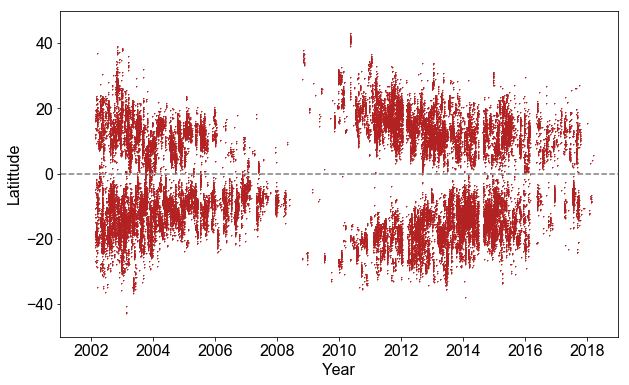

In [8]:
#  Quick Butterfly Diagram
plt.rcParams.update({'font.size': 16,'font.family':"sans-serif",\
                     'font.sans-serif':"Arial",'mathtext.default':"regular"})
fig = plt.figure(figsize=(10, 6))
plt.plot(fl['yr'],fl['lat'],marker='+',markersize=1,linestyle='None',color='firebrick')
plt.plot([2000,2021],[0,0],'--',color='grey')
plt.ylim([-50,50])
plt.xlim([2001,2019])
plt.xlabel('Year')
plt.ylabel('Latittude')
fig.show()